We have two goals:
    1. Minimize number of echoes discarded
    2. Minimize residuals/maximize TSNR

In [24]:
%matplotlib inline
from glob import glob
import os.path as op

import numpy as np
import pandas as pd
import nibabel as nib
import seaborn as sns
import matplotlib.pyplot as plt
from nilearn.masking import unmask
from nilearn.masking import apply_mask

sns.set_style('whitegrid')

In [2]:
y = np.random.random((1000, 5)) + 5.
X = np.random.random((1000, 2))
X[:, 0] = 1

betas, residuals = np.linalg.lstsq(X, y, rcond=None)[:2]
pred_y = np.squeeze(np.dot(X, betas))
rmse = np.sqrt(np.mean((pred_y - y) ** 2, axis=0))

In [3]:
residuals

array([79.62441195, 83.46582538, 81.55053269, 78.97325501, 84.34394735])

In [4]:
rmse

array([0.28217798, 0.28890453, 0.28557054, 0.28102181, 0.29042029])

In [5]:
mask = nib.load('/Users/tsalo/Documents/tsalo/tedana-comparison/sandbox/test_metrics/adaptive_mask.nii')
mask_data = mask.get_data()
mask_data = (mask_data != 0).astype(int)
mask = nib.Nifti1Image(mask_data, mask.affine)
data = apply_mask('/Users/tsalo/Documents/tsalo/tedana-comparison/sandbox/test_metrics/residuals_all.nii',
                  mask)

In [6]:
print(np.min(data))
print(np.max(data))
print(np.mean(data))

0.0026733577067541664
1.8927206265695924
0.04435979202511574


In [7]:
val = np.min(data) + np.max(data)
data2 = np.abs(data - val)
print(np.min(data2))
print(np.max(data2))
print(np.mean(data2))

data3 = 1. / np.sqrt(data)
data3 = data3 / np.max(data3)

0.0026733577067541425
1.8927206265695924
1.8510341922512308


In [8]:
img = unmask(data3, mask)
img.to_filename('/Users/tsalo/Documents/tsalo/tedana-comparison/sandbox/test_metrics/TEST.nii')

In [42]:
t2s = apply_mask('/Users/tsalo/Documents/tsalo/tedana-comparison/sandbox/test_metrics/t2ss.nii',
                  mask)
t2s = t2s[-1, :]
t2s_2 = np.abs(t2s - np.mean(t2s))

In [43]:
temp = img.get_data()
np.where(temp == np.min(data3))

(array([18]), array([21]), array([4]))

In [54]:
temp[23, 32, 11]

0.33213320840309357

In [35]:
in_dir = '/Users/tsalo/Documents/tsalo/tedana-comparison/sandbox/e5_data/'
files = ['sub-01_ses-09_task-flashingcheckerboard_run-01_echo-1_desc-preproc_bold.nii.gz',
         'sub-01_ses-09_task-flashingcheckerboard_run-01_echo-2_desc-preproc_bold.nii.gz',
         'sub-01_ses-09_task-flashingcheckerboard_run-01_echo-3_desc-preproc_bold.nii.gz',
         'sub-01_ses-09_task-flashingcheckerboard_run-01_echo-4_desc-preproc_bold.nii.gz',
         'sub-01_ses-09_task-flashingcheckerboard_run-01_echo-5_desc-preproc_bold.nii.gz']
files = [op.join(in_dir, f) for f in files]
imgs = [nib.load(f) for f in files]
echos = [15.4, 29.7, 44.0, 58.3, 72.6]

In [36]:
data = np.stack([i.get_data() for i in imgs], -1)

/Users/tsalo/anaconda/envs/python3/lib/python3.6/site-packages/matplotlib/figure.py:459: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


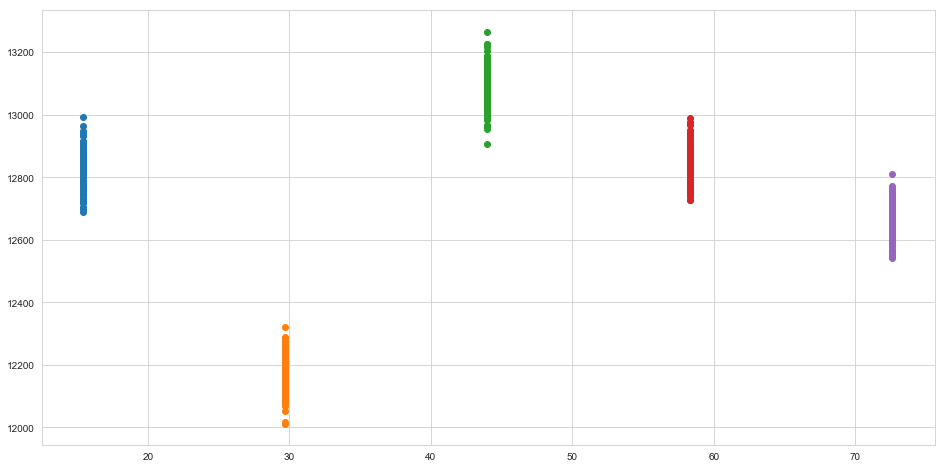

In [53]:
fig, ax = plt.subplots(figsize=(16, 8))
for i in range(data.shape[-1]):
    d = data[23, 32, 11, :, i]
    ax.scatter([echos[i]] * len(d), d)
fig.show()

In [46]:
img2 = nib.load('/Users/tsalo/Documents/tsalo/tedana-comparison/sandbox/test_metrics/t2ss.nii')
dat2 = img2.get_data()[..., -1]

In [50]:
dat2[18, 21, 4]

6.952233623918121

In [51]:
np.where(dat2 < 0)

(array([23, 25, 26, 26]), array([32, 32, 34, 35]), array([11, 12, 10, 10]))

In [52]:
dat2[23, 32, 11]

-5278.900187819892

In [55]:
res_all = nib.load('/Users/tsalo/Documents/tsalo/tedana-comparison/sandbox/test_metrics/residuals_all.nii')
res_all = res_all.get_data()

In [56]:
res_all[23, 32, 11]

0.02423441114331593

In [57]:
np.max(res_all)

1.8927206265695924